# Group Members:

<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Luca Franceschi - u199149
*   Jan Corcho - u188244

# Guide

In this practice, we will cover the following topics:

* Gradient Descent and
* Image Denoising.

First, we will study the *gradient descent* algorithm, one of the
simplest (and more general) function minimization methods. We will consider a toy problem: the minimization of a function $f:\mathbb R^2\rightarrow \mathbb
R$. The second part of the practice is on the application of the gradient
descent method to remove the noise in an image, via the minimization of a
denoising energy.

\\

For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Pre-requisites:** Before the practice, you should review the following topics:

*   Gradient of a function $f:\mathbb R^n\rightarrow \mathbb R$.
*   Level sets (or level lines) of a function $f:\mathbb R^n\rightarrow \mathbb R$, and its geometrical relation to the gradient.
*   Directional derivatives, and how to compute them using the gradient.

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),

\\

**Submission instructions**

Register your group members [here](https://forms.gle/NLeYqhN6LyPnSPg78) if you haven't already.

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

  The evaluation is based on results, conclusions and the commented code together.



[comment]: <> (Macros:)
$\newcommand{\m}{-}
\newcommand{\ma}[1]{\boldsymbol{#1}}
\newcommand{\tras}[1]{#1^{\mathrm{T}}}
\newcommand{\herm}[1]{#1^{\mathrm{H}}}
\newcommand{\con}[1]{#1^{\mathrm{*}}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\tech}[1]{\overline{#1}}
\newcommand{\nspace}{\!\!\!\!}
\newcommand{\nmbr}[1]{\oldstylenums{#1}}
\newcommand{\eg}{\emph{e.g}. } \newcommand{\Eg}{\emph{E.g}. }
\newcommand{\ie}{\emph{i.e}. } \newcommand{\Ie}{\emph{I.e}. }
\newcommand{\cf}{\emph{c.f}. } \newcommand{\Cf}{\emph{C.f}. }
\newcommand{\etc}{\emph{etc}. } \newcommand{\vs}{\emph{vs}. }
\newcommand{\wrt}{w.r.t\onedot } \newcommand{\dof}{d.o.f. }
\newcommand{\etal}{\emph{et al}. }
\newcommand{\R}{\mathbb{R}}
\newcommand{\sign}{\mathrm{sign}}
\newcommand{\eps}{\varepsilon}
\newcommand{\To}{\longrightarrow}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}$

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [ ]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


# Part 1: Gradient Descent

In [ ]:
# import required libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython import display

## Minimization of a toy function

We will use the gradient descent method to compute the minima of the function
$f:\mathbb R^2\rightarrow \mathbb R$ given by,

$$f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)$$

<font color='blue'>**(QUESTION 1.1)**  Complete the Python functions **toy_fun** and **toy_gradient**. These functions implement the function $f$ and its gradient. Follow the comments provided in the code.

In [ ]:
def toy_fun(x: np.ndarray):
    """
    Polynomial toy function - see the guide

    :param x: array [x_1, x_2]

    :return y: value of the function at point x
    """
    # TODO: Compute the function
    y = (np.power(x[0], 4) + np.power(x[1], 4) - 80*np.power(x[0], 2) - 60*np.power(x[1], 2) + 100*x[0] + 50*x[1] + 1) / 1000
    return y

In [ ]:
toy_fun(np.array([100,2]))

99209.877

In [ ]:
def toy_gradient(x: np.ndarray):
    """
    Gradient of toy_fun polynomial toy function

    :param x: 2x1 array
    :return grad: 2x1 array: gradient of the toy function at point x
    """
    # TODO: Compute the gradient of the toy function (must be calculated by hand)
    coeffs = np.array([[4, -160, 100], [4, -120, 50]]) / 1000 # this 2x3 array contains the coefficients of the gradient
    powers = np.power(x, (3, 1, 0)) # this 2x3 array contains the powers of x of the gradient
    grad = np.sum(coeffs * powers, axis=1).reshape((x.shape)) # sum the columns of the element-wise multiplication
    return grad

In [ ]:
x = np.array([[1,2]]).T
toy_gradient(x)

array([[-0.056],
       [-0.158]])

<font color='blue'>**(QUESTION 1.2)** Complete the Python function **gradient_descent**.
This function implements a gradient descent algorithm. We are going to
implement it in a way in which we can use the same gradient descent function
for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.

In [ ]:
def gradient_descent(callback,
                     callback_params: dict,
                     initial_condition: np.ndarray,
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: gradient of function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and
                            its gradient. Useful for the image denoising task.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    iterates = []

    # Main loop for Gradient Descent
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run a gradient descent step. Allow solution to work with additional input.
        fg = step_size * callback(current_value, *callback_params.values())


        # TODO: Update the current value and norm value of gradient
        current_value = current_value - fg
        # current_norm_value = np.sum(current_value / np.sqrt(np.sum(current_value**2)))
        current_norm_value = np.linalg.norm(fg)
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))

        # Plot current position! Just for visualization purposes
        # if x is a 2x1 vector (visualization of toy example)
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[1, 0], current_value[0, 0], marker = 'o', color = "k")
            ax.plot([previous_value[1, 0], current_value[1, 0]],
                    [previous_value[0, 0], current_value[0, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)

        # Update the iteration
        current_iteration += 1
        # Collect iterates
        iterates.append(current_value.copy())

    return current_value, iterates

<font color='blue'>**(QUESTION 1.3a)**   Run the function **toy_main** with several time steps and several initial conditions. What do you observe?

In [ ]:
def toy_main(initial_condition: np.ndarray,
             step_size: float,
             max_iterations: int):
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    # plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z,
                    corner_mask = False, levels = 150,
                    linewidths=(1,), cmap = cm.coolwarm)

    # Set initial condition --> TRY CHANGING IT
    x0 = initial_condition

    # Set additional gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    tolerance = 0.01

    # Call gradient descent minimization
    print("First gradient descent ...")
    xs = gradient_descent(callback = toy_gradient,
                          callback_params = {},
                          initial_condition = x0,
                          step_size = step_size,
                          max_iterations = max_iterations,
                          tolerance = tolerance,
                          fig = fig_contours,
                          ax = ax_contours)
    return xs

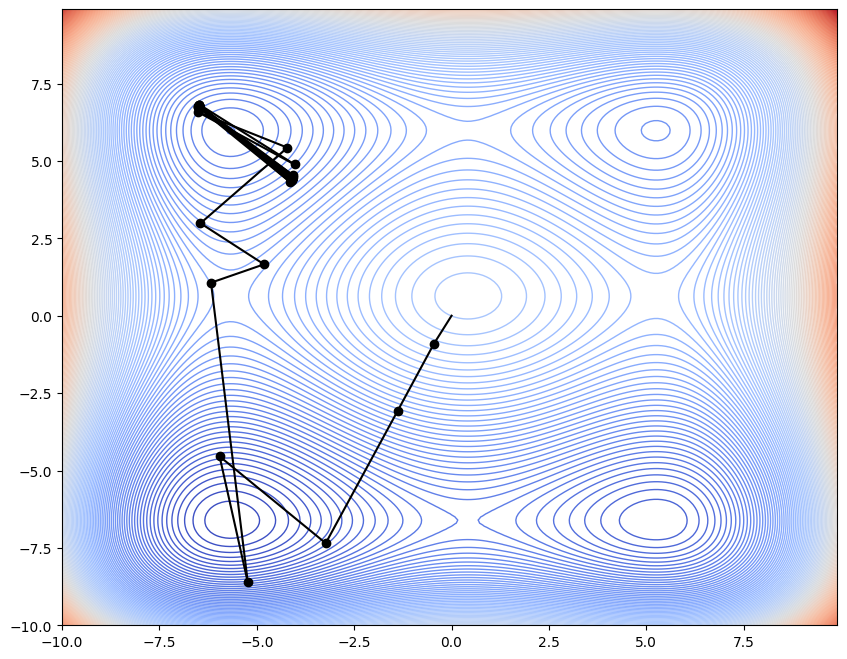

61 of 100 -> tolerance: 3.3608029248063485


In [ ]:
init_condition = np.array([[0], [0]])
step_size_ = 9
max_iters = 100

xs_ = toy_main(init_condition,
                step_size_,
                max_iters)

print(xs_[0])

<font color='red'>**ANSWER**

The initial conditions affect the result greatly, since most of the time it converges to the nearest minima, ignoring the most optimal one.

<font color='blue'>**(QUESTION 1.3b)** Look at the plots returned by **toy_main**. How many local minima does the function have in the domain	$[-10,10]\times [-10,10]$?

<font color='red'>**ANSWER**

It has 4 local minima.

<font color='blue'>**(QUESTION 1.3c)** Run **toy_main** starting from $x^0 = [-2,-8]$. Does it converge to the global minimum?

In [ ]:
# TODO: Set initial condition and run toy_main again
init_condition = np.array([[-2], [-8]])
step_size_ = 1
max_iters = 200

xs_ = toy_main(init_condition,
                step_size_,
                max_iters)

<font color='red'>**ANSWER**

Yes, it converges to the global minimum : [-6.60, -5.67].

<font color='blue'>**(QUESTION 1.3d)** Plot the log error. Hint: refer to slides on "Convergence rate of iterative methods" from the theory lectures.

In [ ]:
# TODO: Get the global minima
# TODO: Set initial condition and run toy_main again
init_condition = np.array([[-2], [-5]])
step_size_ = 1
max_iters = 200

x_star = toy_main(init_condition,
                step_size_,
                max_iters)

display.clear_output()
print('Global Minima at [{pos1:.2f}, {pos2:.2f}] with value {val:.2f}'.format(pos1=x_star[0][0][0], pos2=x_star[0][1][0], val=float(toy_fun(x_star[0])[0])))

In [ ]:
# TODO: Compute the log error using the output from toy_main
np.log(np.abs(toy_fun(xs_[0])[0] - toy_fun(x_star[0])[0]))

In [ ]:
# TODO: Plot log error against the number of time steps
# Hardcoded so the plots make some sense
r = 0.9
M = 0.6178

# We remove the last iteration since it would be log(0) = -inf
list_loss = np.zeros(len(x_star[1])-1)
for i, input in enumerate(x_star[1][:-1]):
    list_loss[i] = np.log(np.abs(toy_fun(input)[0] - toy_fun(x_star[0])[0]))

k = np.arange(len(x_star[1])-1)
linear_conv = k * np.log(r) + np.log(np.abs(toy_fun(x_star[1][0])[0] - toy_fun(x_star[0])[0]))
quad_conv = 2**k * np.log(M * np.abs(toy_fun(x_star[1][0])[0] - toy_fun(x_star[0])[0])) - np.log(M)

plt.title('Log errors')
plt.plot(list_loss, label='Logarithmic loss')
plt.plot(linear_conv, label='Linear convergence')
plt.plot(quad_conv, label='Quadratic convergence')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

<font color='blue'>**(QUESTION 1.3e)** Estimate the rate of convergence from the logarithmic plot you have created.

<font color='red'>**ANSWER**</font>
Linear?

<font color='blue'>**(QUESTION 1.3f)** Try **toy_main** with different step sizes. Which step sizes yield a faster convergence?	Which are more accurate?

In [ ]:
# TODO: Run toy_main with different step sizes
init_condition = np.array([[-2], [-5]])
step_size_ = 0.5
max_iters = 200

x_star = toy_main(init_condition,
                step_size_,
                max_iters)

<font color='red'>**ANSWER**</font>

Faster === higher

Accurate both

# Part 2: Image denoising energy

In this section, we will minimize an energy which enforces close-by pixels to
have a similar value. To minimize such an energy, we will use the gradient-descent method implemented above. Since this is the first assignment in which we work with energies defined over images,
we will start by introducing some notation.

## Discrete images

We consider two types of images:
*Scalar images* and *vector-valued images*.  A scalar image represents an image
with one channel, typically a gray-scale image. Vector-valued images are images
which for each pixel has a vector. It could be for example an RGB image: at
each pixel, we have a 3-dimensional vector with the R, G and B components.
As we are going to see next, although we will not work with color images, we
still need vector valued images for gradient images.

### Scalar images

We define a scalar discrete image as a real function
$u:\Omega\rightarrow \mathbb R$  defined over the rectangular discrete lattice
$\Omega = \{1,\dots,M\}\times\{1,\dots,N\}$ ($N$ columns and $M$ rows). We
refer to the image value at location $(i,j)\in\Omega$ (row $i$, column $j$) as
$u_{i,j}$ or $u_{ij}$. The following for example is an image defined on $\Omega
= \{1,2,3,4\}\times \{1,2,3,4,5\}$.

\

$$
u = \left[
\begin{array}{c c c c c c c}
	u_{11} & u_{12} & u_{13} & u_{14} & u_{15} \\
	u_{21} & u_{22} & u_{23} & u_{24} & u_{25} \\
	u_{31} & u_{32} & u_{33} & u_{34} & u_{35} \\
	u_{41} & u_{42} & u_{43} & u_{44} & u_{45} \\
\end{array}
\right]
$$

\

We will consider the image as a vector in  $\mathbb R^{MN}$, by concatenating
the columns in a huge (column) vector:

\

$$u = [\overbrace{u_{11}, \dots, u_{M1}}^{\text{column 1}},
\overbrace{u_{12}, \dots, u_{M2}}^{\text{column 2}},
\quad\cdots\quad,\overbrace{u_{1N},\dots, u_{MN} }^{\text{column N}}]^T.$$

\

We define the notation $\mathcal X = \mathbb R^{MN}.$ We can think of $\mathcal X$ is the space of
all $M\times N$ images. Since we consider images as vectors in $\mathcal X$, we have a
scalar product and a corresponding norm given as follows:


$$\left\langle u,v \right\rangle_\mathcal X = \sum_{i = 1}^M\sum_{j = 1}^N
u_{ij}v_{ij}\quad\text{and}\quad \|u\|_{\mathcal X} = \sqrt{\langle u,u
\rangle_\mathcal X} = \sqrt{ \sum_{i = 1}^M\sum_{j = 1}^N u_{ij}^2},$$

where $u,v\in\mathcal X$ are two images. In some cases we will call these the
$\mathcal X$-scalar product and the $\mathcal X$-norm.

<font color= "red">**Hint**: *Notice in Python the difference between matrix multiplication and element-wise multiplication when working with* "np.ndarray".

### Vector images

We will also consider *vector-valued images* $g:\Omega\rightarrow \mathbb R^2$.
The value of $g$ at pixel $i,j$ is a two component vector $g_{ij} =
(g_{1,ij},g_{2,ij})\in\mathbb R^2$.
The following for example is an image defined on $\Omega
= \{1,2,3,4\}\times \{1,2,3,4,5\}$:

\

$$g = \left[
\begin{array}{c c c c c c c}
	(g_{1,11},g_{2,11}) & (g_{1,12},g_{2,12}) & (g_{1,13},g_{2,13}) & (g_{1,14},g_{2,14}) & (g_{1,15},g_{2,15}) \\
	(g_{1,21},g_{2,21}) & (g_{1,22},g_{2,22}) & (g_{1,23},g_{2,23}) & (g_{1,24},g_{2,24}) & (g_{1,25},g_{2,25}) \\
	(g_{1,31},g_{2,31}) & (g_{1,32},g_{2,32}) & (g_{1,33},g_{2,33}) & (g_{1,34},g_{2,34}) & (g_{1,35},g_{2,35}) \\
	(g_{1,41},g_{2,41}) & (g_{1,42},g_{2,42}) & (g_{1,43},g_{2,43}) & (g_{1,44},g_{2,44}) & (g_{1,45},g_{2,45})
\end{array}
\right].$$

\

Note that vector-valued images can be separated into two components or channels
$g_1$ and $g_2$. Each component is a scalar image: $g_1,g_2 \in \mathcal X$.

\

$$
g_1 = \left[
\begin{array}{c c c c c c c}
	g_{1,11} & g_{1,12} & g_{1,13} & g_{1,14} & g_{1,15} \\
	g_{1,21} & g_{1,22} & g_{1,23} & g_{1,24} & g_{1,25} \\
	g_{1,31} & g_{1,32} & g_{1,33} & g_{1,34} & g_{1,35} \\
	g_{1,41} & g_{1,42} & g_{1,43} & g_{1,44} & g_{1,45}
\end{array}
\right],\,\,\,
g_2 = \left[
\begin{array}{c c c c c c c}
	g_{2,11} & g_{2,12} & g_{2,13} & g_{2,14} & g_{2,15} \\
	g_{2,21} & g_{2,22} & g_{2,23} & g_{2,24} & g_{2,25} \\
	g_{2,31} & g_{2,32} & g_{2,33} & g_{2,34} & g_{2,35} \\
	g_{2,41} & g_{2,42} & g_{2,43} & g_{2,44} & g_{2,45}
\end{array}
\right].
$$

We will arrange vector-valued images into a vector in $\mathbb R^{2MN}$ by
"vectorizing" first the first component followed by the second:

\

\begin{multline*}
g = [\overbrace{g_{1,11}, \dots, g_{1,N1}}^{\text{col. 1 of comp.
1}},\quad\cdots\quad \overbrace{g_{1,1M}, \dots, g_{1,NM}}^{\text{col. M
of comp. 1}},\\\overbrace{g_{2,11}, \dots, g_{2,N1}}^{\text{col. 1 of comp.
2}},\quad\cdots\quad \overbrace{g_{2,1M}, \dots, g_{2,NM}}^{\text{col. M
of comp. 2}}]^T\in\mathcal Y = \mathbb R^{2MN}.
\end{multline*}

\

The space of all $M\times N$ vector-valued images (with two-component vectors) will be denoted by $\mathcal Y = \mathbb
R^{2MN}.$ Note that we have to be careful to avoid confusions: the value of a vector-valued image $g$ at pixel $(i,j)$, $g_{ij}$, is a vector in $\mathbb R^2$. On the other hand $g$ itself is a vector in $\mathcal Y = \mathbb R^{2MN}$. Therefore we will use different notations for the scalar product and the norm in $\mathbb R^2$ and in $\mathcal Y$.

For vectors in $a = (a_1,a_2), b = (b_1,b_2)\in\mathbb R^2$ we use the
following notations:

$$a\cdot b = a_1b_1 + a_2b_2\quad \text{ and }\quad
|a| = \sqrt{a\cdot a} = \sqrt{a_1^2 + a_2^2}.$$

On the other hand, for two vector-valued images $g,h$ in $\mathcal Y$, we
will use the following $\mathcal Y$-scalar product and $\mathcal Y$-norm, which is defined based the
scalar product in $\mathbb R^2$:

$$
\left\langle g,h \right\rangle_\mathcal Y = \sum_{i = 1}^M\sum_{j = 1}^N
	g_{ij}\cdot h_{ij}.
$$

The $\mathcal Y$-scalar product between two vector-valued images can be computed
as the sums of the $\mathcal X$-scalar products of their channels as follows

\

\begin{multline*}
	\left\langle g,h \right\rangle_\mathcal Y = \sum_{i = 1}^M\sum_{j = 1}^N
	g_{ij}\cdot h_{ij} = \sum_{i = 1}^M\sum_{j = 1}^N (g_{1,ij}h_{1,ij} + g_{2,ij}h_{2,ij})\\
	= \sum_{i = 1}^M\sum_{j = 1}^N g_{1,ij}h_{1,ij}  + \sum_{i = 1}^M\sum_{j =
	1}^N g_{2,ij}h_{2,ij} = \langle g_1,h_1\rangle_{\mathcal X} + \langle g_2,h_2\rangle_{\mathcal X},
\end{multline*}

\

The $\mathcal Y$-norm is defined similarly, and as we show next, it can also
be computed in terms of the $\mathcal X$-norm of the channels:

\

\begin{equation*}
  \|g\|_{\mathcal Y}
  = \sqrt{\langle g,g \rangle_\mathcal Y}
  = \sqrt{ \sum_{i = 1}^M\sum_{j = 1}^N |g_{ij}|^2}
  = \sqrt{\sum_{i = 1}^M\sum_{j = 1}^N (g_{1,ij}^2 + g_{2,ij}^2)} = \sqrt{\|g_1\|_{\mathcal X}^2 + \|g_2\|_{\mathcal X}^2}.
\end{equation*}

## The discrete gradient as a matrix

Since we are working with discrete images, we will consider a discrete
approximation of the gradient, using *forward differences*. We will use
the notation $\nabla^+ u$ to refer to the image forward gradient. The discrete
gradient of $u$ is a vector-valued image, $\nabla^+u:\Omega\rightarrow \mathbb R^2$. It has two components for the horizontal and
vertical partial derivatives.
Thus we have that

$$\nabla^+ u_{ij} =
\left(
	\nabla^+_i u_{ij},
	\nabla^+_j u_{ij}
\right)\in \mathbb R^2.$$

Here $\nabla^+_i$ and $\nabla^+_j$ refer to the forward differences partial
derivatives in the direction of $i$ (rows) and $j$ (columns). These are defined as follows:

$$\nabla^+_i u_{ij} = \left\{
\begin{array}{l l}
	u_{i+1,j} - u_{i,j} & \text{ if } i < M\\
	0 & \text{ if } i = M
\end{array}
\right.\quad\quad
\nabla^+_j u_{ij} = \left\{
\begin{array}{l l}
	u_{i,j+1} - u_{i,j} & \text{ if } j < N\\
	0 & \text{ if } j = N
\end{array}
\right.$$

The $i$ derivative corresponds to the vertical derivative, whereas
the $j$ derivative to the horizontal derivative.

We can consider $\nabla^+_i$ and $\nabla^+_j$ as square matrices of $MN$ rows
and columns. We can "derivate" the image by computing the product of
$\nabla^+_i$ by our vector representation of the image. The result is a vector
representation of the $i$ partial derivative.

For a $4\times 5$ image they would be as follows:

<font size=2em>
$$\nabla^+_j u =
\left[
\begin{array}{c c c c : c c c c : c c c c : c c c c : c c c c}
	\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   \\
	   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   &   &   &   &   \\
	   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   &   &   &   \\
	   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   &   &   \\\hdashline
	   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   &   \\
	   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   &   \\
	   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   &   \\
	   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   &   \\\hdashline
	   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   &   \\
	   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   &   \\
	   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   &   \\
	   &   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   &   \\\hdashline
	   &   &   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   &   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   &   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 &   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &\m1&   &   &   & 1 \\\hdashline
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &\,0\,&   &   &   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &\,0\,&   &   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &\,0\,&   \\
	   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &   &\,0\,
\end{array}
\right]\cdot
\left[
\begin{array}{c}
	u_{11} \\
	u_{21} \\
	u_{31} \\
	u_{41} \\ \hdashline
	u_{12} \\
	u_{22} \\
	u_{32} \\
	u_{42} \\ \hdashline
	u_{13} \\
	u_{23} \\
	u_{33} \\
	u_{43} \\ \hdashline
	u_{14} \\
	u_{24} \\
	u_{34} \\
	u_{44} \\ \hdashline
	u_{15} \\
	u_{25} \\
	u_{35} \\
	u_{45}
\end{array}
\right] =
\left[
\begin{array}{c}
	u_{12} - u_{11} \\
	u_{22} - u_{21} \\
	u_{32} - u_{31} \\
	u_{42} - u_{41} \\ \hdashline
	u_{13} - u_{12} \\
	u_{23} - u_{22} \\
	u_{33} - u_{32} \\
	u_{43} - u_{42} \\ \hdashline
	u_{14} - u_{13} \\
	u_{24} - u_{23} \\
	u_{34} - u_{33} \\
	u_{44} - u_{43} \\ \hdashline
	u_{15} - u_{14} \\
	u_{25} - u_{24} \\
	u_{35} - u_{34} \\
	u_{45} - u_{44} \\ \hdashline
	0 \\
	0 \\
	0 \\
	0
\end{array}
\right]$$

The discrete gradient is a vector-valued image with two components. We
construct a matrix for the whole discrete gradient by concatenating the matrices
$\nabla^+_i$ and $\nabla^+_j$ in a block matrix:

$$\nabla^+u =
\left[
\begin{array}{c}
	 \\
	\,\,\,\nabla^+_i \,\,\,\\
	\\ \hdashline
	 \\
	\,\,\,\nabla^+_j \,\,\,\\
	 \\
\end{array}
\right]\cdot u = \left.\left[
\begin{array}{c}
	 \\
	\nabla^+_i u \\
	 \\ \hdashline
	  \\
	\nabla^+_j u  \\
	\color{white}{.}
\end{array}
\right]\right\}\text{(vector with } 2MN \text{ components)}.$$

<font color='blue'>**(QUESTION 2.1a)** Complete the Python function "im_fwd_gradient". This function computes the forward gradient
$\nabla^+$. Follow the comments provided in the code.

In [ ]:
def im_fwd_gradient(image: np.ndarray):
    """
    Discrete gradient of an image using forward differences, with
    homogeneous Neuman boundary conditions.

    :param image: an MxN image

    :return grad_i: partial derivative in the i direction (vertical)
    :return grad_j: partial derivative in the j direction (horizontal)
    """
    # TODO: Get the size of the image
    image_shape = image.shape

    # TODO: Calculate both gradients
    #       Check the Neuman boundary conditions
    grad_i = np.array([image[i+1][j] - image[i][j] if i<image_shape[0]-1 else 0 for i, j in np.ndindex(image_shape)]).reshape(image_shape)
    grad_j = np.array([image[i][j+1] - image[i][j] if j<image_shape[1]-1 else 0 for i, j in np.ndindex(image_shape)]).reshape(image_shape)
    return grad_i, grad_j

In [ ]:
u = np.array([[1,2,0],[-1,4,3],[3,-5,1]])
u

In [ ]:
gradu_i,gradu_j=im_fwd_gradient(u)
print(f"forward row gradient: \n{gradu_i},\nforward column gradient: \n{gradu_j}")

In [ ]:
check_gradu_i = np.allclose(gradu_i,np.array([[-2.,  2.,  3.],[ 4., -9., -2.],[ 0.,  0.,  0.]]))
check_gradu_j = np.allclose(gradu_j,np.array([[ 1., -2.,  0.], [ 5., -1.,  0.], [-8.,  6.,  0.]]))

print("Is implementation of 'im_fwd_gradient' correct? {}".format(check_gradu_i and check_gradu_j))

<font color='blue'>**(QUESTION 2.1b)** Complete the Python function "im_bwd_divergence". This function computes the backward divergence $div^{-}$. Follow the comments provided in the code.

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) =
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [ ]:
def im_bwd_divergence(vector_image_i: np.ndarray,
                      vector_image_j: np.ndarray):
    """
    Discrete divergence of a vector image using backward differences.
    This is the negative transpose of the im_fwd_gradient

    :param vector_image_i: MxN image of vectical vector components
    :param vector_image_j: MxN image of horizontal vector components

    :return divg: backwards divergence of vector_image
    """
    divg = np.zeros((vector_image_i.shape))

    # TODO: Backwards i partial derivative of gradient_i
    back1 = np.zeros((divg.shape))
    for i,j in np.ndindex(divg.shape):
        if i == 0:
            back1[i][j] = vector_image_i[i][j]
        elif i == divg.shape[0]-1:
            back1[i][j] = -vector_image_i[i-1][j]
        else:
            back1[i][j] = vector_image_i[i][j] - vector_image_i[i-1][j]

    # TODO: Backwards j partial derivative of gradient_j
    back2 = np.zeros((divg.shape))
    for i,j in np.ndindex(divg.shape):
        if j == 0:
            back2[i][j] = vector_image_j[i][j]
        elif j == divg.shape[1]-1:
            back2[i][j] = -vector_image_j[i][j-1]
        else:
            back2[i][j] = vector_image_j[i][j] - vector_image_j[i][j-1]

    divg = back1 + back2

    return divg

In [ ]:
divg_ = im_bwd_divergence(gradu_i,gradu_j)
print(f"backward divergence: \n{divg_}")

In [ ]:
check_divg = np.allclose(divg_,np.array([[ -1.,  -1.,   5.], [ 11., -17.,  -4.], [-12.,  23.,  -4.]]))

print("Is implementation of 'im_bwd_divergence' correct? {}".format(check_divg))

## An energy for image denoising

We now have all the ingredients to formulate our image denoising energy. Let us consider a noisy
image $f:\Omega\rightarrow \mathbb R$. We assume that the image $f$ is the result of contaminating a
clean image $u^*$ by white Gaussian noise:

$$f_{ij} = u^*_{ij} + n_{ij}, \quad\text{ for } 1\leqslant i\leqslant M, 1\leqslant j\leqslant N,$$

where $n_{ij}\sim \mathcal N(0,\sigma)$.

To denoise the image, we consider a model for noiseless images (the image
\emph{prior}). There are many possibilities. In this practice we will assume
that noiseless images have gradients with low norm. This is one of the
simplest models. The image prior represents what we know about the image, *before knowing the actual image*.

We will estimate $u^*$ by computing
the minimum of the following energy $E:\mathbb R^{MN}\rightarrow \mathbb R$:

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N
	c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +
	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

where $c:\Omega\rightarrow [0,1]$ is a coefficients image which controls the
regularization. Recall that $|\cdot|$ denotes the 2-norm in $\mathbb
R^2$:

$$|\nabla^+u_{ij}|^2 = \left(\nabla^+_iu_{ij}\right)^2 +
\left(\nabla^+_ju_{ij}\right)^2.$$

The energy has a regularization term and a data attachment term. Let us explain
them:

\

**Regularization term**

The regularization term penalizes high
gradients. This corresponds to our model for clean images with low discrete
gradients: the value at a pixel should be similar to those of its neighbors.
This is an oversimplistic model: clean images may have discontinuities and high
gradients at the edges of the objects in the image. As a result, our model for
denoising will blur the image edges.

This is why we add the $c_{ij}$ coefficients, to control the penalization of
high gradients. The idea is to use a lower $c_{ij}$ around image edges, and a
higher $c_{ij}$ on regions far from the edges. We will consider $c_{ij}\in [0,1]$.

\

**Data attachment term.**

The data attachment penalizes high
differences with respect to the noisy data. The parameter $\beta > 0$ sets the
strength of the data attachment.

We can express the energy in matrix notation, using our vector
representation of images and discrete gradients. For that, let us define some
useful notation for diagonal matrices. Let us consider a given scalar image
$c\in \mathcal X$. We then define $\text{diag(c)}$ as the
diagonal $MN\times MN$ matrix which has the vectorized image $c$ in the
diagonal. That is:

$$\text{diag}(c) = \left[
\begin{array}{ccc:ccc:ccc:ccc}
	 c_{11} &        &        &        &        &        &        &        &        &        &        &        \\
	        & \ddots &        &        &        &        &        &        &        &        &        &        \\
	        &        & c_{M1} &        &        &        &        &        &        &        &        &        \\\hdashline
	        &        &        & c_{12} &        &        &        &        &        &        &        &        \\
	        &        &        &        & \ddots &        &        &        &        &        &        &        \\
	        &        &        &        &        & c_{M2} &        &        &        &        &        &        \\ \hdashline
	        &        &        &        &        &        & \quad  &        &        &        &        &        \\
	        &        &        &        &        &        &        & \ddots &        &        &        &        \\
	        &        &        &        &        &        &        &        & \quad  &        &        &        \\ \hdashline
	        &        &        &        &        &        &        &        &        & c_{1N} &        &        \\
	        &        &        &        &        &        &        &        &        &        & \ddots &        \\
	        &        &        &        &        &        &        &        &        &        &        & c_{MN}\!\!
\end{array}\right],$$

where we have only shown the non-zero entries. Observe that the multiplication
of a vectorized image $u$ times a diagonal matrix $\text{diag}(c)$, $v =
\text{diag}(c)u$, then $v$ corresponds to the element-wise multiplication
of $c$ and $u$: thus $v_{ij} = c_{ij}u_{ij}$. In fact, this is the main utility of
these diagonal matrices: to be able to write the element-wise multiplication
between images with the matrix multiplication.

Now we can define our energy for image denoising as follows:

\

\begin{eqnarray}
	E(u) = \langle C \nabla^+ u, \nabla^+ u\rangle_{\mathcal Y} + \beta \|u
	- f\|_{\mathcal X}^2.
\end{eqnarray}

\

Here $C$ is a $2MN\times 2MN$ diagonal matrix defined as follows:

$$C = \left[
\begin{array}{c:c}
	\text{diag}(c) &\\\hdashline
	& \text{diag}(c)
\end{array}
\right],$$

which in its diagonal has two copies of the vectorized image $c$. One copy
performs the element-wise multiplication of $c$ with the $i$ partial
derivative and the other with the $j$ partial derivative.

<font color='blue'>**(QUESTION 2.2a)** Complete the Python function "denoise_energy" following the comments provided in the
code.

In [ ]:
def denoise_energy(image: np.ndarray,
                   noise: np.ndarray,
                   coefficients: np.ndarray,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """

    # TODO: Calculate the gradient
    gu_i, gu_j = im_fwd_gradient(image)

    # TODO: Calculate the regularization term
    reg_term = np.sum(coefficients * (gu_i**2 + gu_j**2))

    # TODO: Calculate the data attachment term
    attach_term = beta * np.sum((noise-image)**2)

    # Putting everything together
    energy = reg_term + attach_term

    return energy

In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
res = denoise_energy(image_real,
                    image_noisy,
                    np.ones_like(image_noisy),
                    .05)

In [ ]:
print("Is implementation of 'denoise_energy' correct? {}".format(res == 92.25))

<font color='blue'>**(QUESTION 2.2b)** Compute the gradient of the denoise energy function
$E(u) = \langle C \nabla^+ u, \nabla^+ u\rangle_{\mathcal Y} + \beta \|u	- f\|_{\mathcal X}^2$.

<font color='red'>**ANSWER**

$\nabla E(u) = ?$

no he hecho la derivacion hay que hacerla

\begin{equation}
	\nabla E(u) = -2div^{-}(C\nabla^+u_{ij}) + 2\beta(u - f)
\end{equation}

<font color='blue'>**(QUESTION 2.2c)** Complete the Python function "denoise_energy_gradient" following the comments provided in the
code.

In [ ]:
def denoise_energy_gradient(image: np.ndarray,
                            noise: np.ndarray,
                            coefficients: np.ndarray,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u
    """
    # TODO: Calculate the gradient
    gu_i, gu_j = im_fwd_gradient(image)

    # TODO: Calculate the gradient of data attachment term
    grad_reg_term = -2 * im_bwd_divergence(coefficients*gu_i, coefficients*gu_j)

    # TODO: Calculate the gradient of data attachment term
    grad_attach_term = 2 * beta * (image-noise)

    # Putting everything together
    grade = grad_reg_term + grad_attach_term

    return grade

In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
grade_ = denoise_energy_gradient(image_real,
               image_noisy,
               np.ones_like(image_noisy),
               .05)

In [ ]:
check_grade = np.allclose(grade_,np.array([[-10.5,  -8.5,  -6.5], [ -0.5,   1.5,   3.5], [  3.5,   5.5,   7.5]]))

print("Is implementation of 'denoise_energy_gradient' correct? {}".format(check_grade))

## Example with a noisy image

First we need some helper files:

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Move to your drive
%cd /content/drive/MyDrive/

In [ ]:
# Clone repo with auxilary files required for this and the following labs.
# This needs to be done only once for the course.
# If there is an error, then you attended the first lab! :)
!git clone https://github.com/Muchay/OptTechCourse_Aux.git

In [ ]:
# Create source path
source = "/content/drive/MyDrive/OptTechCourse_Aux/Lab2/"

Next, we create a noisy image and attempt to denoise it.

**Load the image**

In [ ]:
images_dir = os.path.abspath(source+"images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

In [ ]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy data")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [ ]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),    # --> CHANGE THIS AND COMPARE
    "beta": .05                                   # --> CHANGE THIS AND COMPARE
}
step_size = .1                                   # --> CHANGE THIS AND COMPARE
max_iterations = 100                              # --> CHANGE THIS AND COMPARE
tolerance = .1                                    # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd, _ = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params,
                            initial_condition = image_noisy,
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance)

**Show the results**

In [ ]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy data")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

In [ ]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

In [ ]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')

<font color='blue'>**(QUESTION 2.3a)** Run the example with different
parameters (for instance, changing the maximum number of iterations, $c$, $\beta$,etc. Can you explain what you observe?

<font color='red'>**ANSWER**

Number of iterations: The more number of operations the less noise and more blurr.


<font color='blue'>**(QUESTION 2.3b)** What are the effects of changing $c$?

<font color='red'>**ANSWER**

<font color='blue'>**(QUESTION 2.3c)** Try to find the parameters gives you a smaller Mean Square Error. You can use the Python function $mse$.

In [ ]:
# TODO: Run example with different parameters and check MSE
### WRITE YOUR SOLUTION

from sklearn.metrics import mean_squared_error as mse
mse = mse(noise, denoised)
print(mse)

<font color='red'>**ANSWER**